### AutoEncoder
- 입력이 들어왔을 때, 해당 입력 데이터를 최대한 압축시킨 후 , 데이터의 특징을 추출하여 다시 본래의 입력 형태로 복원시키는 신경망
- https://velog.io/@jochedda/%EB%94%A5%EB%9F%AC%EB%8B%9D-Autoencoder-%EA%B0%9C%EB%85%90-%EB%B0%8F-%EC%A2%85%EB%A5%98 참고

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

(60000, 28, 28) (60000,)


In [3]:
train_X = train_X / 255.0
test_X = test_X / 255.0

In [4]:
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

(60000, 784) (60000,)


### 오토엔코더 : 엔코더, 디코더, 잠재변수

In [5]:
model = tf.keras.Sequential([
    # 엔코드
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
                        # 784 = 28 * 28 을 1열로 펼쳤을 때 값
    # 잠재변수
    tf.keras.layers.Dense(64, activation='relu',),
    #디코더
    tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716640 (2.73 MB)
Trainable params: 716640 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 3s 9ms/step - loss: 0.0502
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0166
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0118
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0098
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0086
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0078
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0073
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0069
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0066
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0063


1/1 [==============================] - 0s 15ms/step


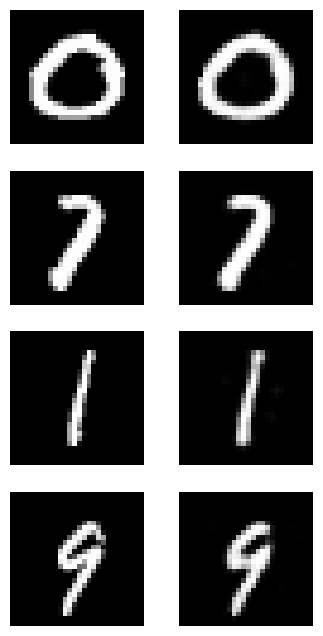

313/313 [==============================] - 1s 2ms/step - loss: 0.0060


0.006029314827173948

In [7]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c* 2 + 1)
    random_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[random_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c * 2 + 2)
    img = model.predict(np.expand_dims(test_X[random_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

### CNN 활용

In [8]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),
                                    # strides=(2, 1)에 의해 데이터 크기는 14, 14
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='relu'),
                                    # strides=(2, 1)에 의해 데이터 크기는 7, 7
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                200768    
                                                                 
 dense_4 (Dense)             (None, 3136)              203840    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)       

In [9]:
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 8s 32ms/step - loss: 0.0791
Epoch 2/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0364
Epoch 3/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0258
Epoch 4/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0230
Epoch 5/20
235/235 [==============================] - 9s 38ms/step - loss: 0.0219
Epoch 6/20
235/235 [==============================] - 10s 44ms/step - loss: 0.0212
Epoch 7/20
235/235 [==============================] - 11s 45ms/step - loss: 0.0207
Epoch 8/20
235/235 [==============================] - 11s 49ms/step - loss: 0.0204
Epoch 9/20
235/235 [==============================] - 15s 63ms/step - loss: 0.0201
Epoch 10/20
235/235 [==============================] - 17s 72ms/step - loss: 0.0200
Epoch 11/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0198
Epoch 12/20
235/235 [==============================] - 18s 75ms/step - loss: 0.0196
Epoch 

1/1 [==============================] - 0s 34ms/step


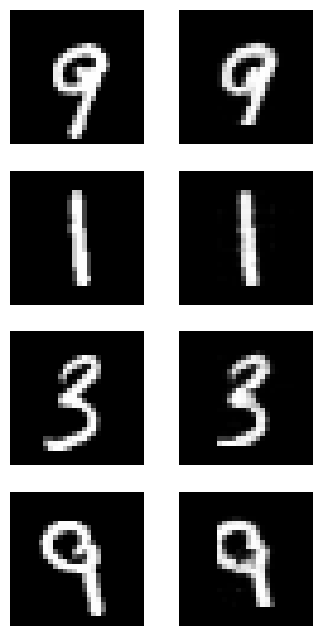

313/313 [==============================] - 2s 5ms/step - loss: 0.0186


0.018582036718726158

In [10]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c* 2 + 1)
    random_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[random_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c * 2 + 2)
    img = model.predict(np.expand_dims(test_X[random_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

### ReLU와 ELU
- x가 0보다 작으면 무조건 0값을 가지는 ReLU가 아무리 연산량이 간단하더라도 안좋을 수가 있으니
- 음(-)의 값을 조금이라도 가지게끔 ELU를 적용

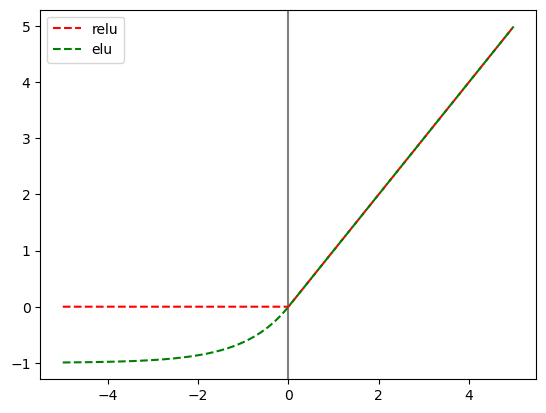

In [11]:
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z)-1) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g--', label='elu')
plt.legend()
plt.show()


### 다시 CNN(ELU 적용)

In [12]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='elu', input_shape=(28, 28, 1)),
                                    # strides=(2, 1)에 의해 데이터 크기는 14, 14
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='elu'),
                                    # strides=(2, 1)에 의해 데이터 크기는 7, 7
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(7*7*64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 15s 52ms/step - loss: 0.0531
Epoch 2/20
235/235 [==============================] - 19s 80ms/step - loss: 0.0189
Epoch 3/20
235/235 [==============================] - 18s 79ms/step - loss: 0.0129
Epoch 4/20
235/235 [==============================] - 21s 91ms/step - loss: 0.0109
Epoch 5/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0101
Epoch 6/20
235/235 [==============================] - 18s 79ms/step - loss: 0.0095
Epoch 7/20
235/235 [==============================] - 10s 42ms/step - loss: 0.0092
Epoch 8/20
235/235 [==============================] - 10s 43ms/step - loss: 0.0090
Epoch 9/20
235/235 [==============================] - 10s 43ms/step - loss: 0.0087
Epoch 10/20
235/235 [==============================] - 14s 59ms/step - loss: 0.0085
Epoch 11/20
235/235 [==============================] - 12s 51ms/step - loss: 0.0084
Epoch 12/20
235/235 [==============================] - 13s 57ms/step - loss: 0.0076
E

1/1 [==============================] - 0s 20ms/step


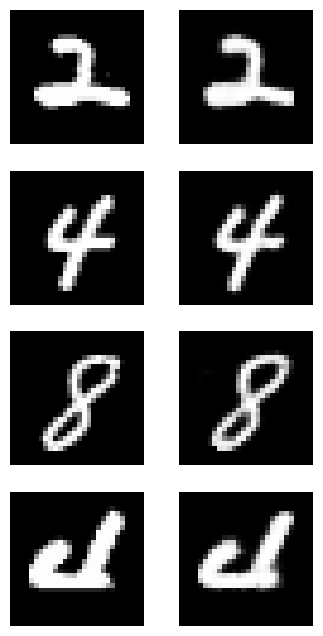

313/313 [==============================] - 1s 4ms/step - loss: 0.0065


0.006465876009315252

In [13]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c* 2 + 1)
    random_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[random_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c * 2 + 2)
    img = model.predict(np.expand_dims(test_X[random_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

### 잠재변수 벡터 확보
- CNN(ELU) 모델 중 3번째 layers(tf.keras.layers.Dense(64, activation='elu'))에서의 출력 값을 가져오겠다
- 하나의 숫자이미지(784)를 64개의 특성으로 출력했다

In [14]:
latent_vactor_model = tf.keras.Model(inputs = model.input, outputs = model.layers[3].output)
latent_vactor = latent_vactor_model.predict(train_X)
print(latent_vactor.shape)
print(latent_vactor[0])

1875/1875 [==============================] - 6s 3ms/step
(60000, 64)
[20.595827   -0.9999999  -0.9999997  12.3407135  12.20272    15.472261
 28.298922   -0.99999434 -0.9999991  12.095915   -0.9999995  -0.9999993
 13.49989    -0.9999954   7.8227887  11.647599   15.5702915  11.653977
 -0.9999997  21.409094   -0.99999976 11.425433   -0.9999999  -0.9999995
 -0.99999815 14.3429165   6.6706223  22.428017   -0.9999998  21.33471
 14.620523   -0.9999995  -0.9999749  26.855675    8.089471   -0.9999998
  8.719112    9.392689   -0.99999905 10.655411   17.700136   -0.99999887
 -0.99999845 -0.9999997   3.973609   -0.99999994 24.57954     3.6819584
 12.742768   20.623236   15.824584   -0.99999934  2.8466768   3.7667801
 -0.66211313 18.649572   -0.9999995   4.4666004  13.7480135  -0.971092
 -0.99999976 12.475659    6.401317   18.170727  ]


### 군집

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vactor)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [16]:
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[8 1 9 ... 0 6 4]
(10, 64)
[ 9.927219   -0.99985665 -0.9994565  10.814659    7.0817804  10.091547
  7.622054   -0.99837536 -0.99993825  7.2921224  -0.9999376  -0.999892
 10.540155   -0.9779881  13.505882    4.0837865   9.434557   14.911619
 -0.99990904  6.614559   -0.99952054 16.254236   -0.99993694 -0.9998654
 -0.99975735 10.578723   13.992335    9.151272   -0.9998762  12.7441845
 14.952248   -0.99948174 -0.9875517  10.271011   11.77724    -0.9999623
  9.137047    4.1530995  -0.99957204 10.438538    8.333013   -0.99961406
 -0.9998847  -0.9998766   2.892562   -0.9999527  14.406807   10.111971
  8.784216   10.2909975  11.764048   -0.99983424  9.459604    4.941705
  3.2632694  12.931381   -0.9999473   8.039245   10.296492   -0.5507025
 -0.99995077 11.332262   13.400144    7.186087  ]


### 시각화

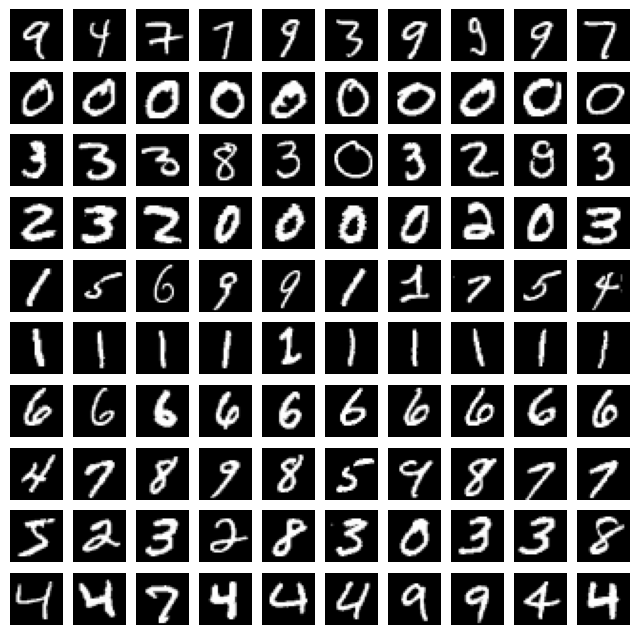

In [17]:
plt.figure(figsize=(8, 8))

for i in range(10):
    images = train_X[kmeans.labels_ == i]
    for c in range(10):
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28, 28), cmap='gray')
        plt.axis('off')

plt.show()

### t-SNE
- 고차원의 벡터를 저차원으로 옮겨서 시각화에 도움을 주는 방법
- t Stochastic Nearest Neghbor
- k-Means가 각 클러스터를 계산하기 위한 단위로 중심과 각 데이터의 거리를 측정한다면
- t-SNE는 각 데이터의 유사도를 정의하고 원래 공간에서의 저차원 유사도와 공간에서의 유사도가 비슷해지도록 학습
- 여기서 유사도는 수학적으로 확률로 표현

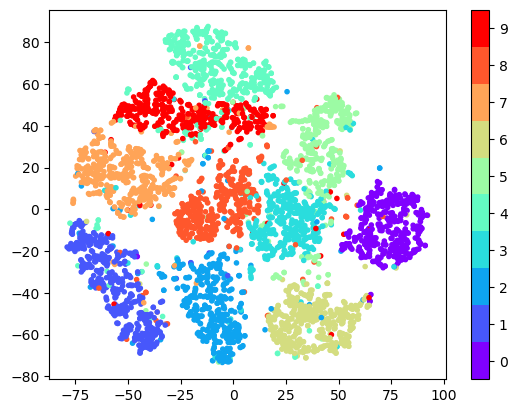

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vactor[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker='.', c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters -1) / n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()